## Missing Values- Feature Engineering- Day 1

Lifecycle of a Data Science Projects
1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?

1. ##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. ##### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [8]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
#print(df['cabin_null'])
##find the percentage of null values
df['cabin_null'].mean()

np.float64(0.7710437710437711)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [11]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

,cabin_null
Survived,
0,0.876138
1,0.602339


#### Missing At Random(MAR)

In [ ]:
Men---hide their salary
Women---hide their age

In [ ]:
### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


#### Mean/ MEdian /Mode imputation
When should we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [12]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
## Lets go and see the percentage of missing values
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median=df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

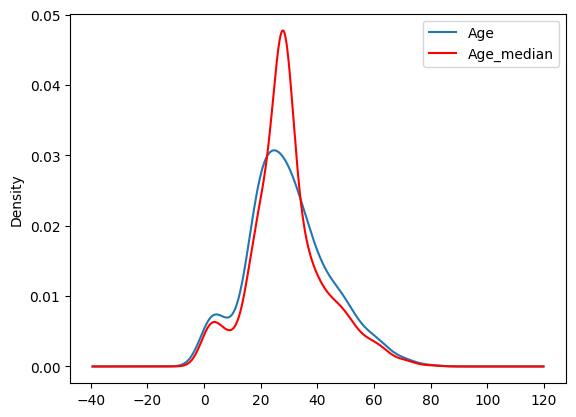

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation
